<a href="https://colab.research.google.com/github/BalkeesRekik/DS3001/blob/main/Linear_model_lab.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

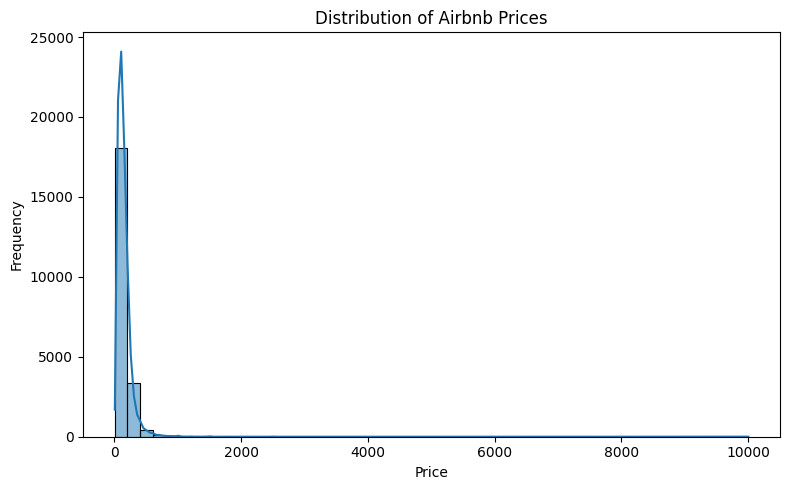

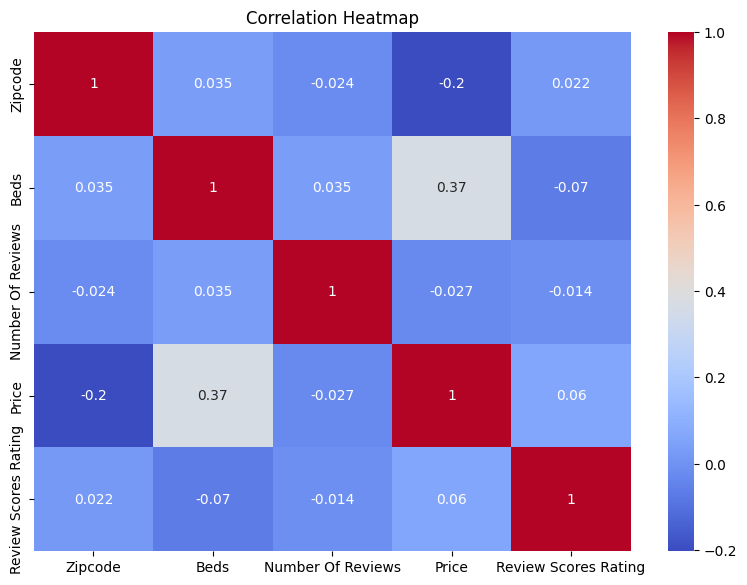

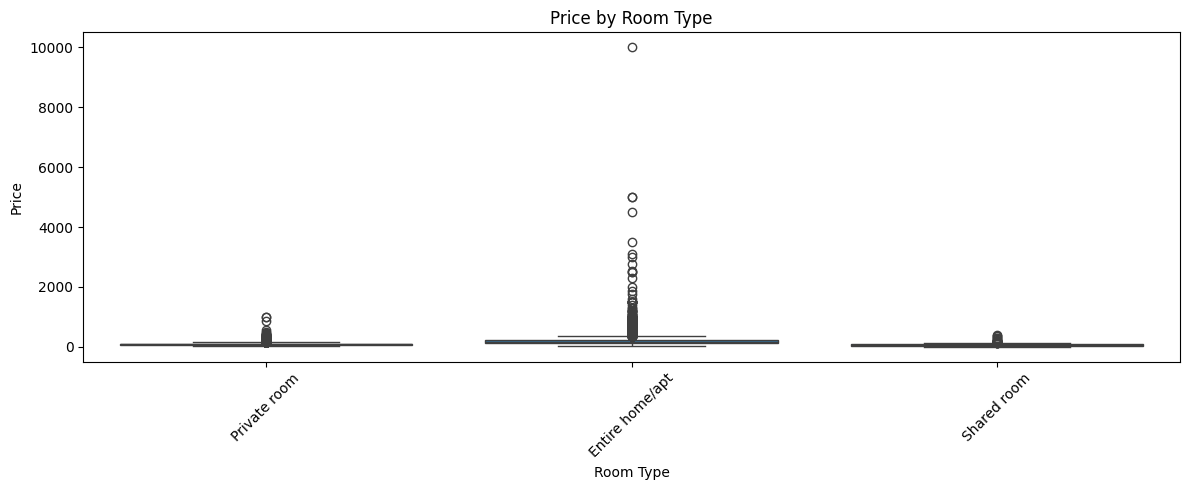

Baseline Model:
Train RMSE: 131.01758145742767
Test RMSE: 116.065902525935
Train R^2: 0.2522680997950626
Test R^2: 0.2968161092001059

Polynomial + Interaction Model:
Train RMSE: 129.43539089951332
Test RMSE: 117.67106799531976
Train R^2: 0.2702185299078086
Test R^2: 0.27723186450958925


In [1]:
# Airbnb Hedonic Pricing Regression Analysis

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import PolynomialFeatures

df = pd.read_csv("/content/airbnb_hw (1).csv")

df = df.drop(columns=["Host Id", "Host Since", "Name", "Number of Records"])

df["Price"] = df["Price"].replace('[\$,]', '', regex=True).astype(float)
df = df[df["Price"].notnull() & (df["Price"] > 0)]

df = df.dropna(subset=["Property Type", "Beds", "Zipcode", "Review Scores Rating"])
df = df.drop(columns=["Review Scores Rating (bin)"], errors='ignore')

df.columns = df.columns.str.strip()

# EDA: Price distribution
plt.figure(figsize=(8, 5))
sns.histplot(df["Price"], bins=50, kde=True)
plt.title("Distribution of Airbnb Prices")
plt.xlabel("Price")
plt.ylabel("Frequency")
plt.tight_layout()
plt.show()

# EDA: Correlation heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(df.select_dtypes(include=['float64', 'int64']).corr(), annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.tight_layout()
plt.show()

# EDA: Boxplot
plt.figure(figsize=(12, 5))
sns.boxplot(x="Room Type", y="Price", data=df)
plt.title("Price by Room Type")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

df_encoded = pd.get_dummies(df, columns=["Neighbourhood", "Room Type", "Property Type"], drop_first=True)

X = df_encoded.drop(columns=["Price"])
y = df_encoded["Price"]

# Train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Baseline Linear Regression
lr = LinearRegression()
lr.fit(X_train, y_train)
y_train_pred = lr.predict(X_train)
y_test_pred = lr.predict(X_test)
print("Baseline Model:")
print("Train RMSE:", np.sqrt(mean_squared_error(y_train, y_train_pred)))
print("Test RMSE:", np.sqrt(mean_squared_error(y_test, y_test_pred)))
print("Train R^2:", r2_score(y_train, y_train_pred))
print("Test R^2:", r2_score(y_test, y_test_pred))

# Polynomial + Interaction Features
X_num = df_encoded[["Beds", "Review Scores Rating", "Number Of Reviews", "Zipcode"]]
X_cat = df_encoded.drop(columns=["Price", "Beds", "Review Scores Rating", "Number Of Reviews", "Zipcode"])
poly = PolynomialFeatures(degree=2, include_bias=False)
X_num_poly = poly.fit_transform(X_num)
X_full = np.hstack((X_num_poly, X_cat.values))
X_train_poly, X_test_poly, y_train_poly, y_test_poly = train_test_split(X_full, y, test_size=0.2, random_state=42)

lr_poly = LinearRegression()
lr_poly.fit(X_train_poly, y_train_poly)
y_train_pred_poly = lr_poly.predict(X_train_poly)
y_test_pred_poly = lr_poly.predict(X_test_poly)
print("\nPolynomial + Interaction Model:")
print("Train RMSE:", np.sqrt(mean_squared_error(y_train_poly, y_train_pred_poly)))
print("Test RMSE:", np.sqrt(mean_squared_error(y_test_poly, y_test_pred_poly)))
print("Train R^2:", r2_score(y_train_poly, y_train_pred_poly))
print("Test R^2:", r2_score(y_test_poly, y_test_pred_poly))
